In [12]:
import pandas as pd
import numpy as np

print("OK - shopping_env kernel is running")


OK - shopping_env kernel is running


# Lab 1 – Market Basket Analysis with Apriori

## 1. Mục tiêu
- Thực hiện phân tích giỏ hàng (Market Basket Analysis) bằng thuật toán Apriori.
- Khám phá các tập phổ biến (frequent itemsets).
- Sinh ra các luật kết hợp (association rules).
- Trực quan hóa và rút ra insight kinh doanh.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [14]:
DATA_PATH = "../data/online_retail.csv"

df = pd.read_csv(DATA_PATH, encoding="ISO-8859-1")
print(df.shape)


(541909, 8)


In [15]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [17]:
df_clean = df.copy()

df_clean = df_clean.dropna(subset=["InvoiceNo"])
df_clean = df_clean[df_clean["Quantity"] > 0]
df_clean = df_clean[df_clean["UnitPrice"] > 0]

print("Kích thước sau khi làm sạch:", df_clean.shape)


Kích thước sau khi làm sạch: (530104, 8)


In [18]:
df_clean = df_clean[df_clean["Country"] == "United Kingdom"]
print("Sau khi lọc UK:", df_clean.shape)


Sau khi lọc UK: (485123, 8)


In [19]:
df_clean["TotalPrice"] = df_clean["Quantity"] * df_clean["UnitPrice"]
df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


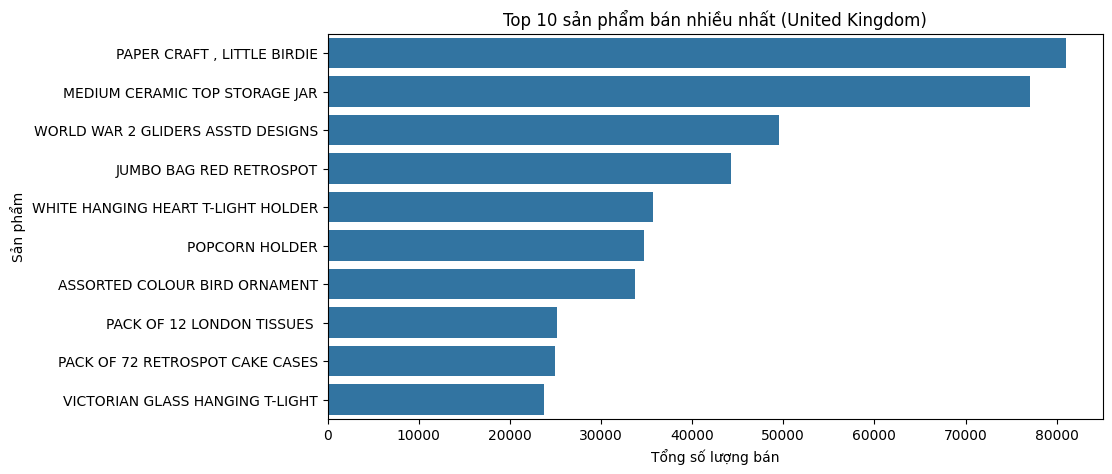

In [20]:
top_products = (
    df_clean.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 sản phẩm bán nhiều nhất (United Kingdom)")
plt.xlabel("Tổng số lượng bán")
plt.ylabel("Sản phẩm")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_3804\1725946078.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["TotalPrice"]


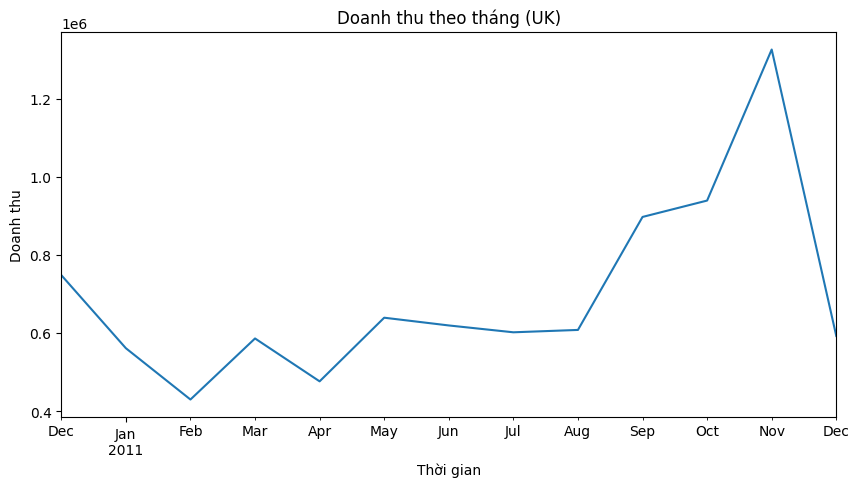

In [21]:
df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"])

monthly_revenue = (
    df_clean
    .set_index("InvoiceDate")
    .resample("M")["TotalPrice"]
    .sum()
)

plt.figure(figsize=(10, 5))
monthly_revenue.plot()
plt.title("Doanh thu theo tháng (UK)")
plt.xlabel("Thời gian")
plt.ylabel("Doanh thu")
plt.show()


## Nhận xét EDA

- Doanh thu có xu hướng tăng vào các tháng cuối năm, đặc biệt là giai đoạn lễ hội.
- Một số sản phẩm trang trí, quà tặng chiếm tỷ trọng lớn trong tổng số lượng bán.
- Điều này cho thấy hành vi mua sắm theo mùa và các nhóm sản phẩm thường được mua kèm nhau.


In [22]:
OUTPUT_PATH = "../data/cleaned_online_retail.parquet"

df_clean.to_parquet(OUTPUT_PATH, index=False)

print("Đã lưu dữ liệu sạch tại:", OUTPUT_PATH)


Đã lưu dữ liệu sạch tại: ../data/cleaned_online_retail.parquet
